<a href="https://colab.research.google.com/github/manower35/ML-Project/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
# print("x:\n{}".format(x))
# UPDATE: Using an f-string for modern, readable string formatting.

print(f"x:\n{x}")
print(x)

x:
[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


**SciPy** is a Python library used for scientific and technical computing. It builds on NumPy and provides a large collection of mathematical algorithms and functions, including optimization, integration, interpolation, eigenvalue problems, and more.

In [ ]:
from scipy import sparse
# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Since we imported sparse,we could convert this to a sparse format for efficiency:

In [ ]:
sparse_eye = sparse.csr_matrix(eye)
print(sparse_eye)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [ ]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
<COOrdinate sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [ ]:
print("Data values:", eye_coo.data)
print("Row indices:", eye_coo.row)
print("Column indices:", eye_coo.col)

Data values: [1. 1. 1. 1.]
Row indices: [0 1 2 3]
Column indices: [0 1 2 3]


In [ ]:
print(eye_coo.toarray())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


**Matplotlib** is a popular Python library for creating static, interactive, and animated visualizations. It's widely used for generating plots, histograms, power spectra, bar charts, errorcharts, scatterplots, and more, making it essential for data analysis and scientific research.

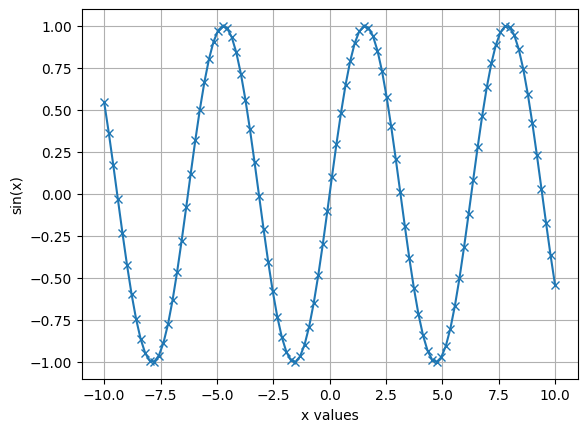

In [ ]:
import matplotlib.pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
plt.xlabel("x values")  #  Lavel
plt.ylabel("sin(x)")
plt.grid(True)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

**Pandas** is a **Python library** for working with **data tables** (like spreadsheets).
It helps us **store, clean, filter, and analyze** data easily.
 Main structures:

  * **Series** → 1D labeled data
  * **DataFrame** → 2D table of rows and columns
* Works well with **NumPy** and integrates with **Matplotlib** for plotting.

In [ ]:
import pandas as pd
data = {"Name": ["A", "B","C"], "Age": [25, 30, 40]}
df = pd.DataFrame(data)
print(df)

  Name  Age
0    A   25
1    B   30
2    C   40


In [ ]:
# Select all rows that have an age column greater than 30
display(df[df.Age > 25])

,Name,Age
1,B,30
2,C,40


Check Version

In [ ]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)


Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
pandas version: 2.2.2
matplotlib version: 3.10.0
NumPy version: 2.0.2
SciPy version: 1.16.1
IPython version: 7.34.0
scikit-learn version: 1.6.1


**A First Application: Classifying Iris Species**

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print("Keys:", list(iris.keys()))
print("data shape:", iris.data.shape)
print("feature names:", iris.feature_names)
print("target names:", iris.target_names)

Keys: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
data shape: (150, 4)
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [ ]:
print(f"Target names: {iris['target_names']}")

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Feature names: \n{}".format(iris['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# After Python 3.6
print(f"Feature names:\n{iris['feature_names']}")

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(f"Type of data: {type(iris['data'])}")

Type of data: <class 'numpy.ndarray'>


In [ ]:
print(f"Shape of data: {(iris['data'].shape)}")

Shape of data: (150, 4)


In [ ]:
print(f"First five columns of data:\n{(iris['data'][:5])}")

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(f"Type of target: {(type(iris['target']))}")

Type of target: <class 'numpy.ndarray'>


In [ ]:
print(f"Shape of target: {(iris['target'].shape)}")

Shape of target: (150,)


In [ ]:
print(f"Target:\n{(iris['target'])}")

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print("Target:\n{}".format(iris['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print("Target:\n", (iris['target']))

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Python Printing Methods** Common style

.format() Method

f-Strings (Formatted String Literals)



In [ ]:
# Define a variable 'var' with a value
var = "example_value"

print("Label:", var)
print("Label: {}".format(var))
print(f"Label: {var}")

Label: example_value
Label: example_value
Label: example_value


**Measuring Success: Training and Testing Data**

metrics

Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC

Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE), R² score

In [6]:
# Importing the Function
from sklearn.model_selection import train_test_split

In [9]:
# Calling the Function
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


Creating a DataFrame from the Training Data

In [ ]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


 Creating a Scatter Matrix

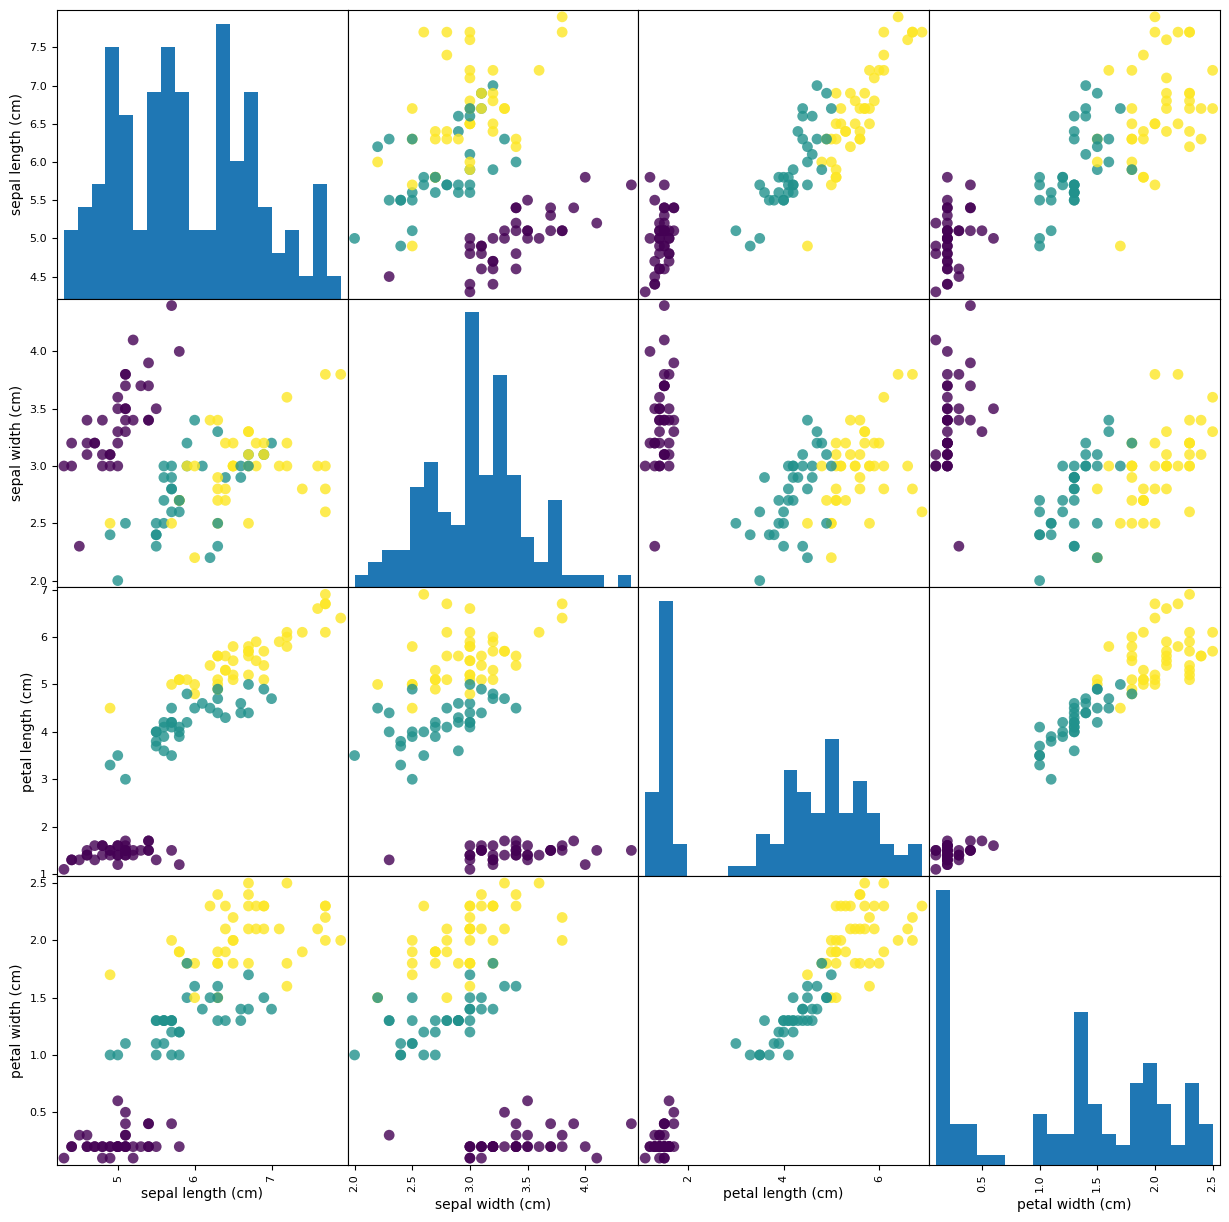

In [ ]:
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt

iris_dataframe = pd.DataFrame(X_train, columns=iris['feature_names'])
scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.8,
    cmap='viridis'
)
plt.show()


Building Your First Model: k-Nearest Neighbors

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: \n", X_new.shape)

X_new.shape: 
 (1, 4)


In [14]:
prediction = knn.predict(X_new)
print("Prediction:\n", prediction)
print("Predicted target name:\n",
      iris['target_names'][prediction])

Prediction:
 [0]
Predicted target name:
 ['setosa']


Evaluating the Model

In [15]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", (y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
 print(f"Test set score: {np.mean(y_pred == y_test):.2f}")

Test set score: 0.97


In [22]:
print(f"Test set score: {knn.score(X_test, y_test):.2f}")

Test set score: 0.97
